In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('../data/Dataset_ecommerce (1).csv')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


## Data Preprocessing And Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [6]:
# Dropping missing values in CustomerID
df = df.dropna(subset=["CustomerID"])

In [7]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
df["TotalPrice"] = df["UnitPrice"] * df ["Quantity"] 

In [10]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


## Exploratory Data Analysis

#### Sales Trends Over Time

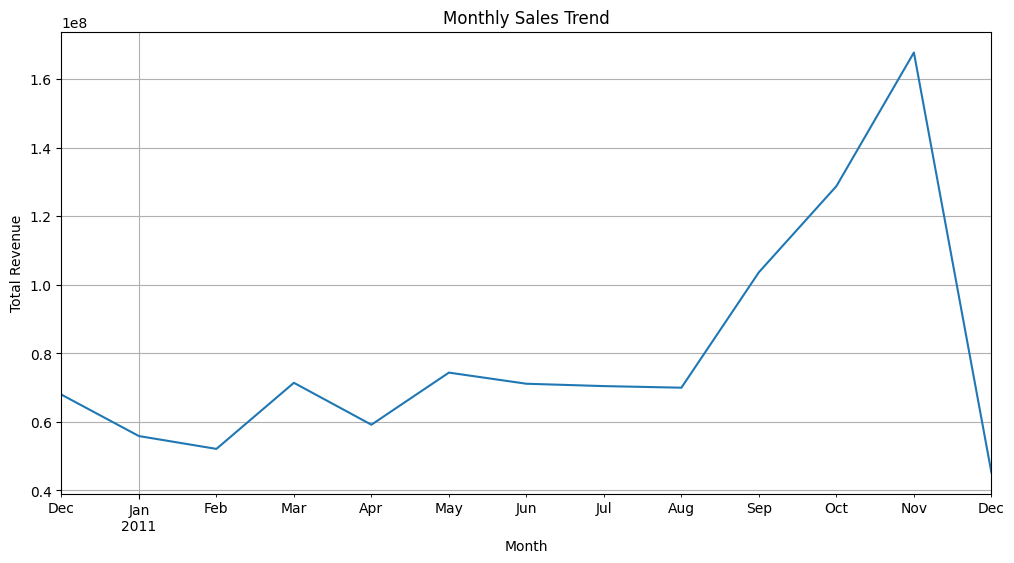

In [33]:
import os

# Sales Trends Over Time
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()

# Create folder one level up
output_dir = os.path.join(os.path.dirname(os.getcwd()), 'visualizations')
os.makedirs(output_dir, exist_ok=True)

# Plot and save
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)

# Save as PNG
output_path = os.path.join(output_dir, 'monthly_sales_trend.png')
plt.savefig(output_path)

plt.show()


### Sales Trend Observations

- **Initial Dip:** Sales declined from December to February, hitting a low in February.  
- **Moderate Recovery:** Slight growth in March and May, followed by a flat trend from June to August.  
- **Strong Growth:** Sharp increase from September to November, with November being the peak month.  
- **Sharp Drop:** Significant decline in December, likely due to seasonal closure or end of data collection.


#### Top Selling Products

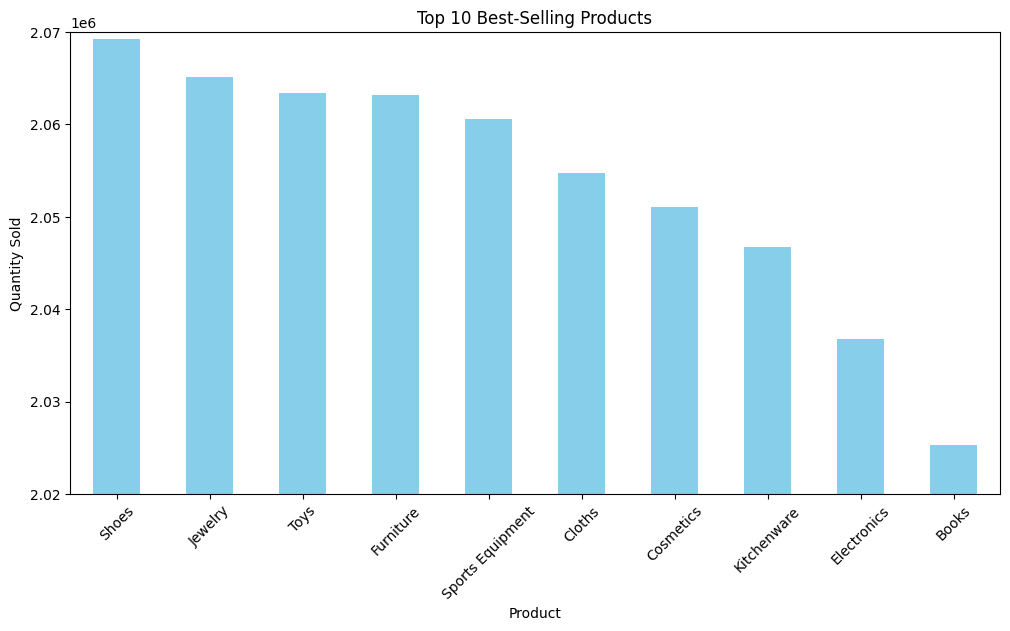

In [35]:
# Top Selling Products
# Total quantity sold per product
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Create folder one level up if it doesn't exist
output_dir = os.path.join(os.path.dirname(os.getcwd()), 'visualizations')
os.makedirs(output_dir, exist_ok=True)

# Plot
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.ylim(2.02e6, 2.07e6)

# Save the figure
output_path = os.path.join(output_dir, 'top_10_best_selling_products.png')
plt.savefig(output_path)

plt.show()

### Top 10 Best-Selling Products - Key Insights

- The bar chart displays the **Top 10 products by total quantity sold**, with all categories nearing **2 million units**.
- **Shoes** lead slightly, followed closely by **Jewelry, Toys, Furniture**, and others.
- This near-uniform performance suggests a **well-diversified product portfolio** and **balanced consumer demand**.
- Such distribution reduces reliance on a single product and reflects **effective inventory and marketing strategies**.
- This balance enhances **business resilience** and supports consistent performance across **seasonal or market shifts**.


#### Customer Activity

In [23]:
df['CustomerID'].nunique(), df['InvoiceNo'].nunique()

(4372, 22190)

In [36]:
df.groupby('CustomerID')['InvoiceNo'].nunique().max()

np.int64(248)

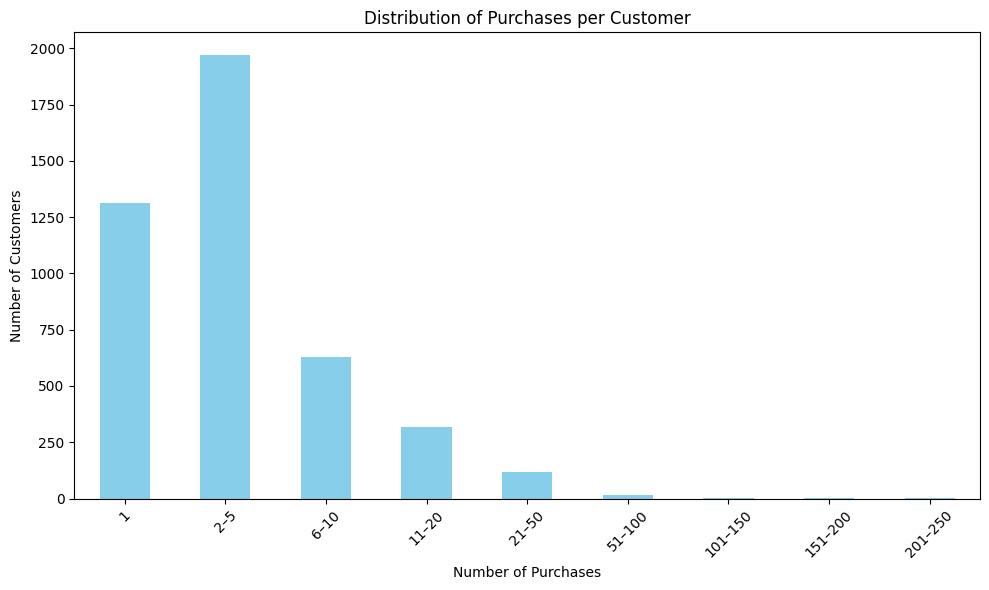

In [32]:
# Count unique purchases per customer
customer_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Create folder one level up if it doesn't exist
output_dir = os.path.join(os.path.dirname(os.getcwd()), 'visualizations')
os.makedirs(output_dir, exist_ok=True)

# Bin the number of purchases into ranges
bins = [0, 1, 5, 10, 20, 50, 100, 150, 200, 250]
labels = ['1', '2–5', '6–10', '11–20', '21–50', '51–100', '101–150', '151–200', '201–250']
binned = pd.cut(customer_purchases, bins=bins, labels=labels, include_lowest=True)

# Count number of customers in each bin
purchase_distribution = binned.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
purchase_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchases per Customer')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure (after plotting)
output_path = os.path.join(output_dir, 'Distribution_of_Purchases_per_Customer.png')
plt.savefig(output_path)

# Show the plot
plt.show()



### Observations: Distribution of Purchases per Customer

- The majority of customers made **between 2–5 purchases**, followed by those who purchased only **once**.
- A **sharp drop-off** is observed after the 6–10 purchase range, with significantly fewer high-frequency buyers.
- Very few customers fall into the **51+ purchase** categories, indicating that **loyal, repeat customers are rare**.
- The distribution is **right-skewed**, suggesting that most customers are occasional buyers, while only a small fraction are highly engaged.
- This pattern highlights an opportunity to **improve customer retention and encourage repeat purchases** through targeted strategies.
